In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
# K =10
mu = 0
sigma = 1
theta = np.random.normal(mu, sigma, 10)

In [3]:
theta

array([ 0.38551813,  0.27517106, -0.06071895, -1.94012207, -1.25764127,
        1.43174239, -0.13729164, -0.70401686,  0.19646283, -0.03721637])

In [4]:

mean = 0
std = 2 # variance = 4
X_vc = np.random.normal(mean, std, size = (1200,10))
X_c = np.random.normal(mean, std, size = (200,10))
X_Costly = np.random.normal(mean, std, size = (7,10))

In [5]:
# noise
epsilon1 = np.random.normal(0 , 0.31, 1200).reshape(1200,1)
epsilon2 = np.random.normal(0 , 0.31, 200).reshape(200,1)
epsilon3 = np.random.normal(0 , 0.31, 7).reshape(7,1)

In [6]:
epsilon1.shape

(1200, 1)

In [7]:
theta = theta.reshape(10,1)

In [8]:
y1 = X_vc@theta + epsilon1
y2 = X_c@theta + epsilon2
y3 = X_Costly@theta + epsilon3

In [9]:
lr = LinearRegression()
ridge = Ridge()

In [10]:
lr.fit(X_vc, y1)

LinearRegression()

In [11]:
theta_1 = lr.coef_

In [12]:
theta_1

array([[ 0.38589849,  0.27916855, -0.06068057, -1.93748828, -1.25648967,
         1.43308447, -0.13719926, -0.70144779,  0.19768017, -0.03784555]])

In [13]:
lr.fit(X_c, y2)

LinearRegression()

In [14]:
theta_2 = lr.coef_
theta_2

array([[ 0.38445874,  0.28972902, -0.08333967, -1.92624853, -1.2718668 ,
         1.44011633, -0.14069093, -0.68769528,  0.18201896, -0.02898883]])

In [15]:
lr.fit(X_Costly, y3)

LinearRegression()

In [16]:
theta_3 = lr.coef_
theta_3

array([[ 0.36723799, -0.02698671, -0.54709092, -1.05122076, -1.30350215,
         1.15036346, -0.43178178,  0.63852141,  0.31281291, -0.19466772]])

In [17]:
dist1 =  np.linalg.norm(theta - theta_1)
dist2 =  np.linalg.norm(theta - theta_2)
dist3 =  np.linalg.norm(theta - theta_3)
dist1

12.517189398511672

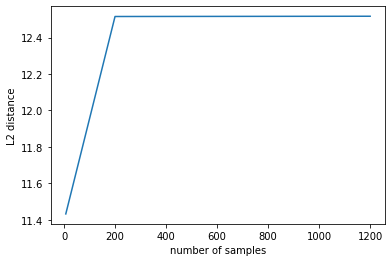

In [22]:
samples = np.array([7, 200, 1200])
l2 = np.array([dist3, dist2, dist1])
plt.plot(samples, l2)
plt.xlabel("number of samples")
plt.ylabel('L2 distance')
plt.show()

In [28]:
lambda_parameter = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 1, 10]
dist = []
for i in range(0, 8):
    ridge = Ridge(alpha = lambda_parameter[i])
    ridge.fit(X_vc, y1)
    theta_ = ridge.coef_
    dist.append(np.linalg.norm(theta_ - theta))

In [29]:
dist

[12.517176447893068,
 12.517163497343425,
 12.517137596451006,
 12.517085795493623,
 12.516982196888566,
 12.516775012916451,
 12.515894677907154,
 12.50427314260591]

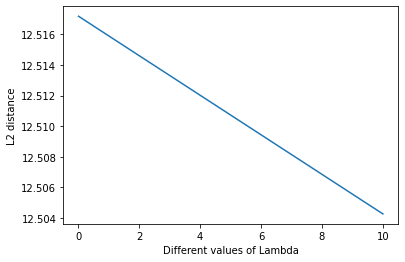

In [30]:
plt.plot(lambda_parameter, dist)
plt.xlabel("Different values of Lambda")
plt.ylabel('L2 distance')
plt.show()